In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import xml.etree.ElementTree as ET
import cv2
import seaborn as sns
from sklearn import utils
import tensorflow as tf



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
# Merkmalsreduktion
# Schneide irrelevante Informationen aus dem Bilder heraus.
# Speichere die Merkalsreduzierten Bilder in einen neuen Ordner /data/

all_dogs = 0  # Zählvariable der Hundebilder 
data_dir = os.getcwd() + '\\'
breed_list = os.listdir(data_dir + 'images\\Images\\')
os.makedirs('data', exist_ok=True)


for breed in breed_list:
    os.makedirs('data\\' + breed, exist_ok=True)
for breed in os.listdir('data'):
    for file in os.listdir(data_dir + 'annotation\\Annotation\\' + breed):
        img = Image.open(data_dir + 'images\\Images\\' + breed + '\\' + file + '.jpg')
        tree = ET.parse(data_dir + 'annotation\\Annotation\\' + breed + '\\' + file)
        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
        img = img.crop((xmin,ymin,xmax,ymax))
        img = img.convert('RGB')
        img.save('data//' + breed + '/' + file + '.jpg')
        all_dogs = all_dogs+1

In [3]:
#lese daten  in "bilder aka imagepath array ein und der dazugehörigen daten aka label_array"
# Speichere die Bilddaten (RGB Werte) in ein array
# Speichere die Hunderassen in 
SCALE = 32 # Setzte Skalierungsfaktor auf welchen die Bilder alle Skaliert werden
data_array = []
label_array= []
breedNum = 0
for breed in breed_list:
    imagepath=(data_dir + 'data\\' + breed )
    for img in os.listdir(imagepath):
        img_array=cv2.imread(os.path.join(imagepath,img))
        #data_array.append(img_array.tolist())
        data_array.append(cv2.resize(img_array,(SCALE,SCALE)).tolist())
        label_array.append(breedNum) # Setze Hunderasseart auf eine ID
    breedNum = breedNum + 1

In [4]:
#reshape und skaliere alle Bilder
data_array = np.array(data_array)
data_array = data_array.reshape(len(data_array), 3, SCALE, SCALE).transpose(0,2,3,1)

Aufgabe 2:

In [5]:

#### Schuffel einschalten###
label_array, data_array = utils.shuffle(label_array, data_array)

# Einteilen der TEST und TRAIN Daten
size_of_train= int(all_dogs*0.75)
size_of_test = int(all_dogs*0.25)
X_train = np.array(data_array[:size_of_train])
Y_train = np.array(label_array[:size_of_train])

X_test = np.array(data_array[-size_of_test:])
Y_test = np.array(label_array[-size_of_test:])

Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [6]:

input_shape = (SCALE, SCALE, 3)


X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_train=X_train / 255.0

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
X_test=X_test / 255.0


Y_train = tf.one_hot(Y_train.astype(np.int32), depth=10)
Y_test = tf.one_hot(Y_test.astype(np.int32), depth=10)


In [7]:

batch_size = 32
num_classes = 10
epochs = 30


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Conv2D(128, 3, padding='same', input_shape=X_train.shape[1:],  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax'),

])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
            loss='categorical_crossentropy', metrics=['acc'])

In [8]:



#history = model.fit(X_train, Y_train, batch_size=batch_size,
#                epochs=epochs)
print(X_train.shape)
print(Y_train.shape)
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          #shuffle=False,
          verbose=1)
          #validation_data=(X_test, Y_test))

(639, 32, 32, 3)
(639, 10)
Epoch 1/30
20/20 [==============================] - 1s 23ms/step - loss: 1.8498 - acc: 0.2473
Epoch 2/30
20/20 [==============================] - 0s 25ms/step - loss: 1.4648 - acc: 0.3412
Epoch 3/30
20/20 [==============================] - 0s 23ms/step - loss: 1.2639 - acc: 0.4351
Epoch 4/30
20/20 [==============================] - 1s 29ms/step - loss: 1.1494 - acc: 0.4898
Epoch 5/30
20/20 [==============================] - 1s 33ms/step - loss: 1.0987 - acc: 0.5180
Epoch 6/30
20/20 [==============================] - 1s 34ms/step - loss: 1.0460 - acc: 0.5430
Epoch 7/30
20/20 [==============================] - 1s 28ms/step - loss: 1.0123 - acc: 0.5649
Epoch 8/30
20/20 [==============================] - 1s 34ms/step - loss: 0.9218 - acc: 0.5962
Epoch 9/30
20/20 [==============================] - 0s 23ms/step - loss: 0.9607 - acc: 0.5900
Epoch 10/30
20/20 [==============================] - 1s 28ms/step - loss: 0.9591 - acc: 0.5759
Epoch 11/30
20/20 [=============

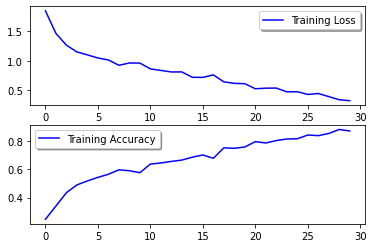

In [9]:

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [10]:

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7877416014671326
Test accuracy: 0.6995305418968201


In [11]:
#
#scores = cross_val_score(model, X_test, Y_test, cv=3, scoring='accuracy')
#print('\nCross-Validation-Score 3-fold')
#print(scores)
#

Confusion Matrix
 X-Achse = Predicted Labeles Y-Achse = die wahren Labels 


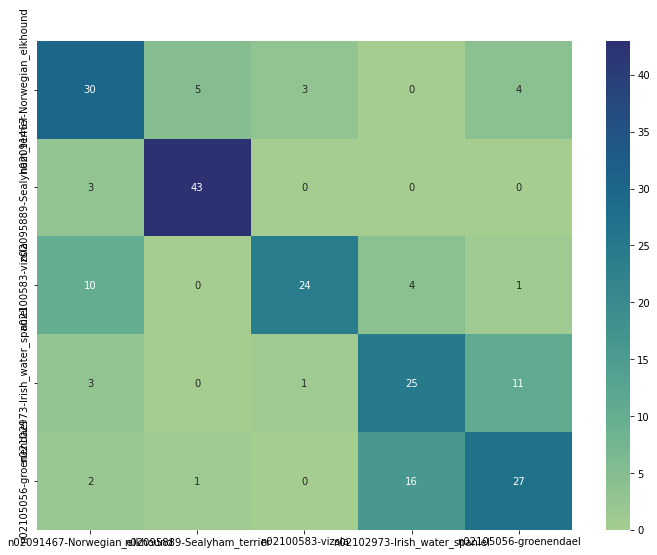

In [12]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test, verbose=0)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors

y_true = np.argmax(Y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))

c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap="crest")
c.set(xticklabels=breed_list, yticklabels=breed_list)



print("Confusion Matrix")
print(" X-Achse = Predicted Labeles Y-Achse = die wahren Labels ")
